# Filters

In [43]:
def imshow2(im, filteredim):
    plt.subplots(figsize=(15, 20))
    plt.subplot(211)
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.subplot(212)
    plt.axis('off')
    plt.imshow(filteredim, cmap='gray')
    plt.show()

In [44]:
def make_gaussian(n):
    m = n // 2 + 1
    k = np.zeros((n, n), dtype=int)
    for i in range(m):
        for j in range(m):
            k[i, j] = (2**j)*(2**i)
            k[i, n-j-1] = (2**j)*(2**i)
    for i in range(m):
        k[n - i - 1] = k[i]
    return k/np.sum(k)

## Matrix convolution

In [57]:
def conv(mat, kernel):
    r, c = mat.shape
    n = len(kernel)
    rows, cols = r-(n-1), c-(n-1)
    out = np.zeros((rows, cols), dtype=np.float64)
    for i in range(rows):
        for j in range(cols):
            temp = 0
            for k in range(n):
                for l in range(n):
                    temp += mat[i + k, j + l]*kernel[k, l]
            out[i, j] = temp
    return out

In [54]:
k = make_gaussian(5)
print(k)

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


In [56]:
im = ski.data.chelsea()
im = np.average(im, weights=[0.2125, 0.7154, 0.0721], axis=-1)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


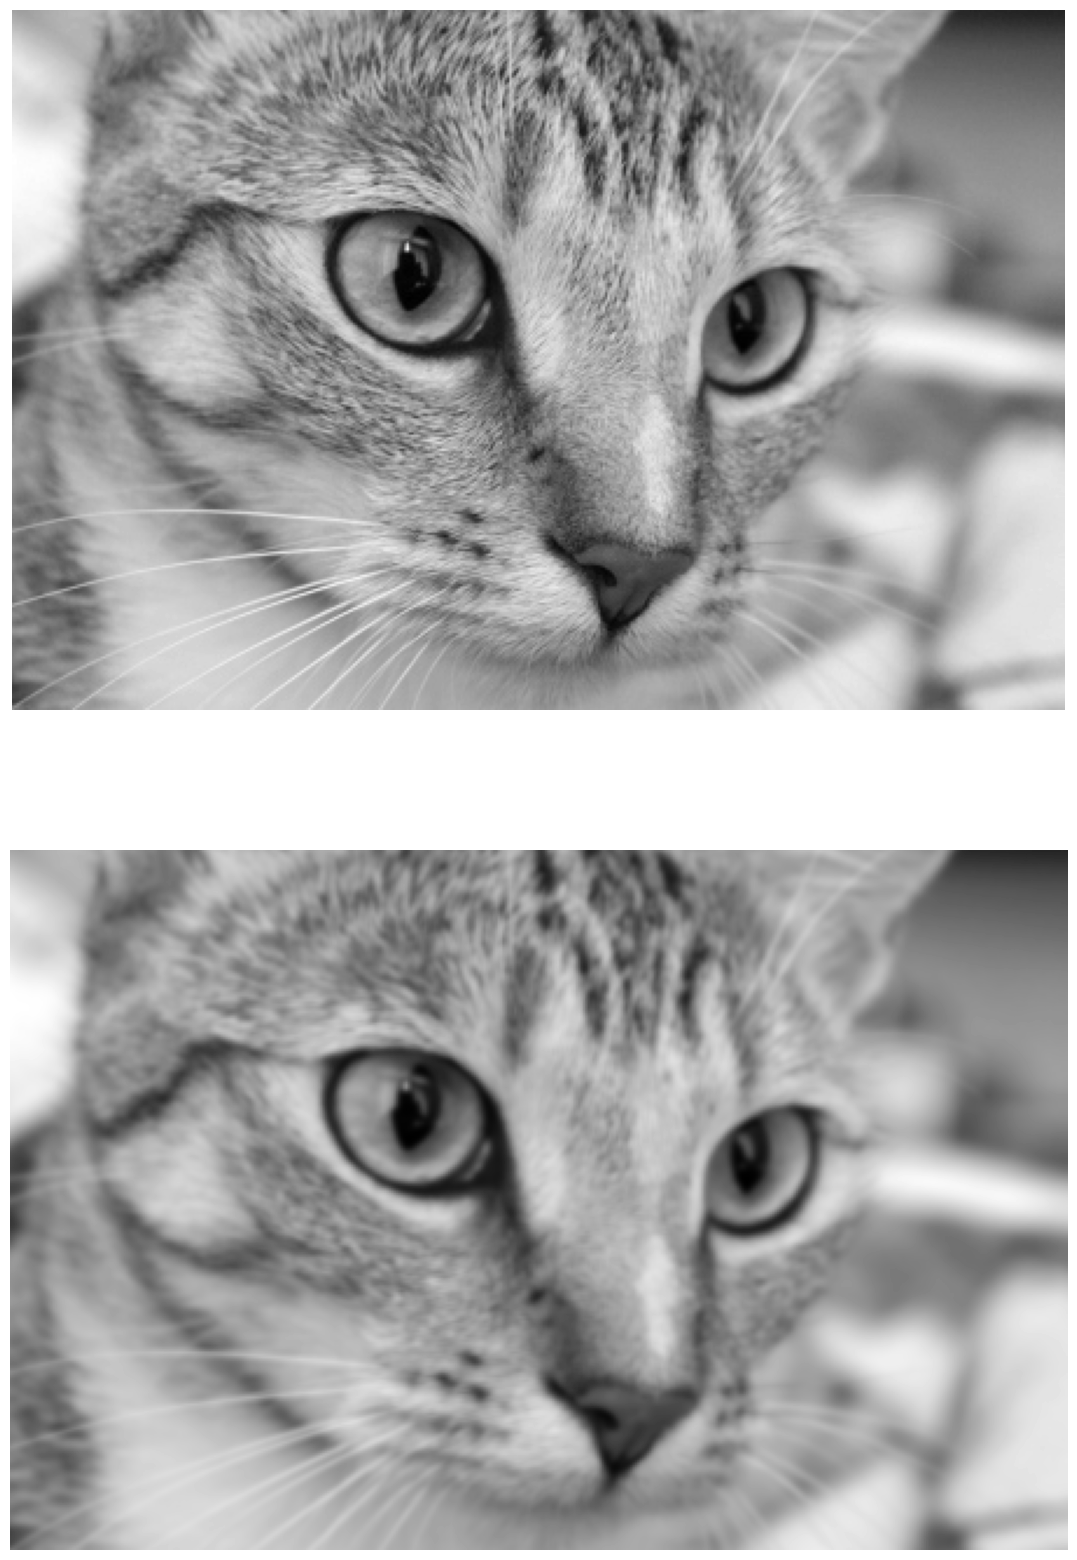

In [58]:
filteredim = conv(im, k)
imshow2(im, filteredim)

In [59]:
k = make_gaussian(11)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


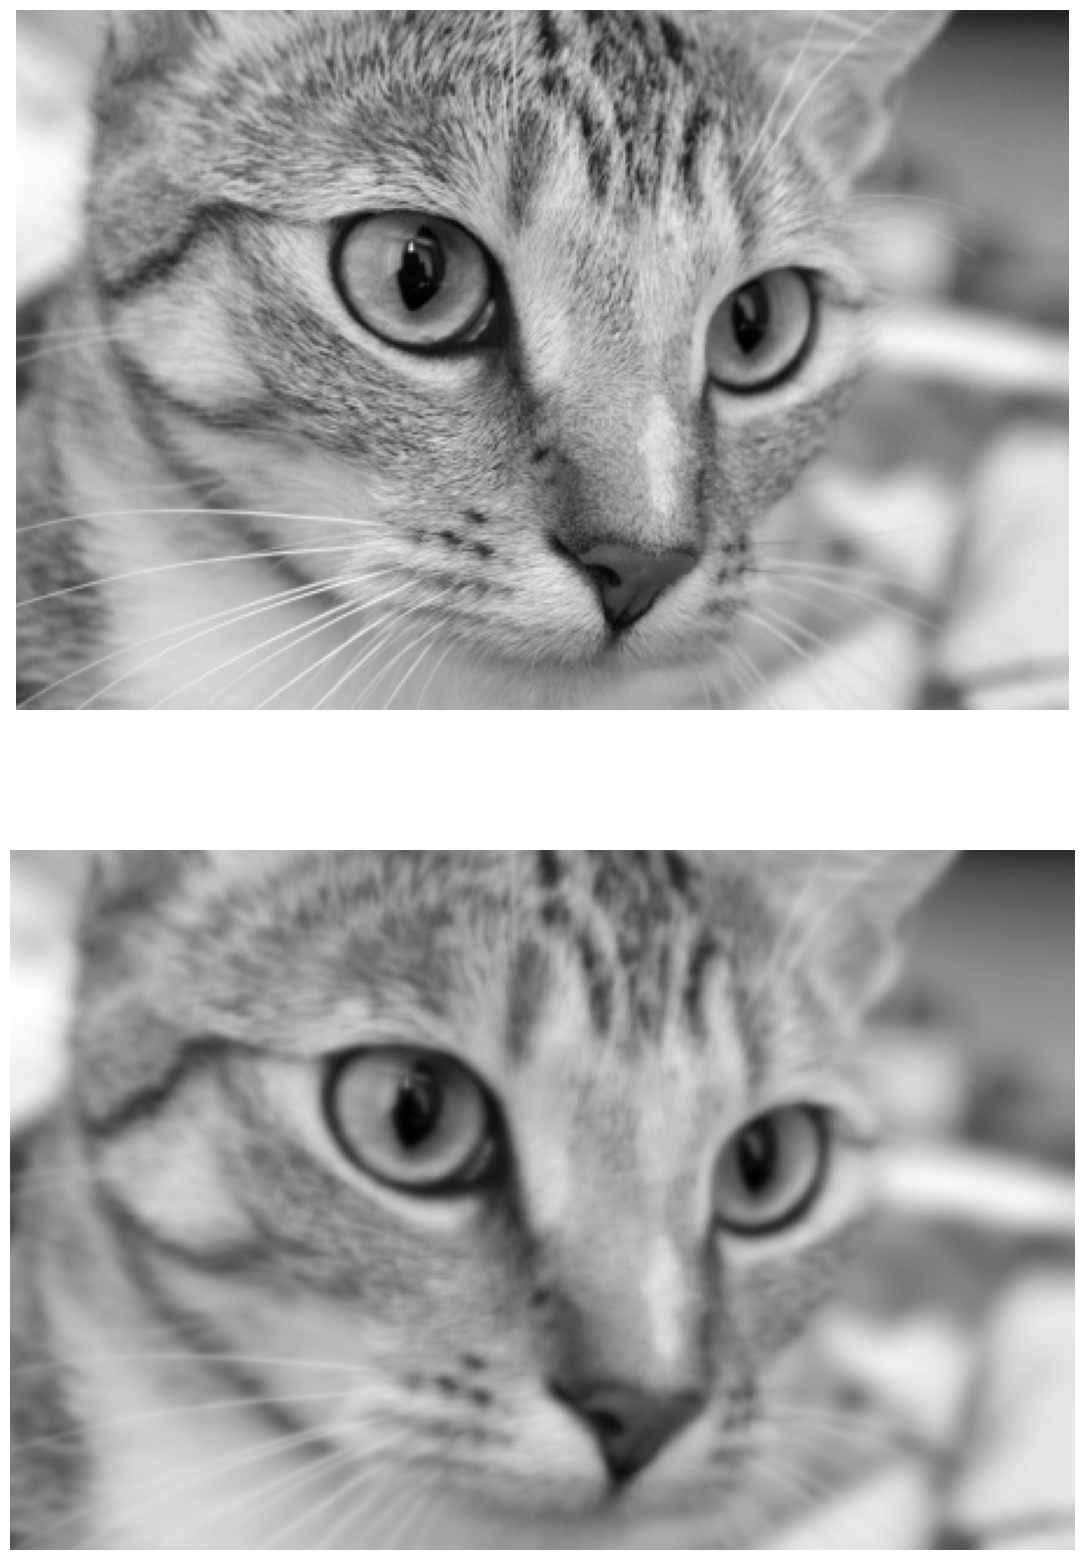

In [60]:
filteredim = conv(im, k)
imshow2(im, filteredim)

## Laplacian

In [61]:
def laplacian(im):
    k = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])
    im = im.astype(np.float64)
    temp = conv(im, k)
    aux = temp.astype(np.ubyte)
    out = im[1:-1,1:-1] - aux
    out = out - np.min(out)
    out = 255*(out/np.max(out))
    return out

In [62]:
im = ski.data.camera()

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


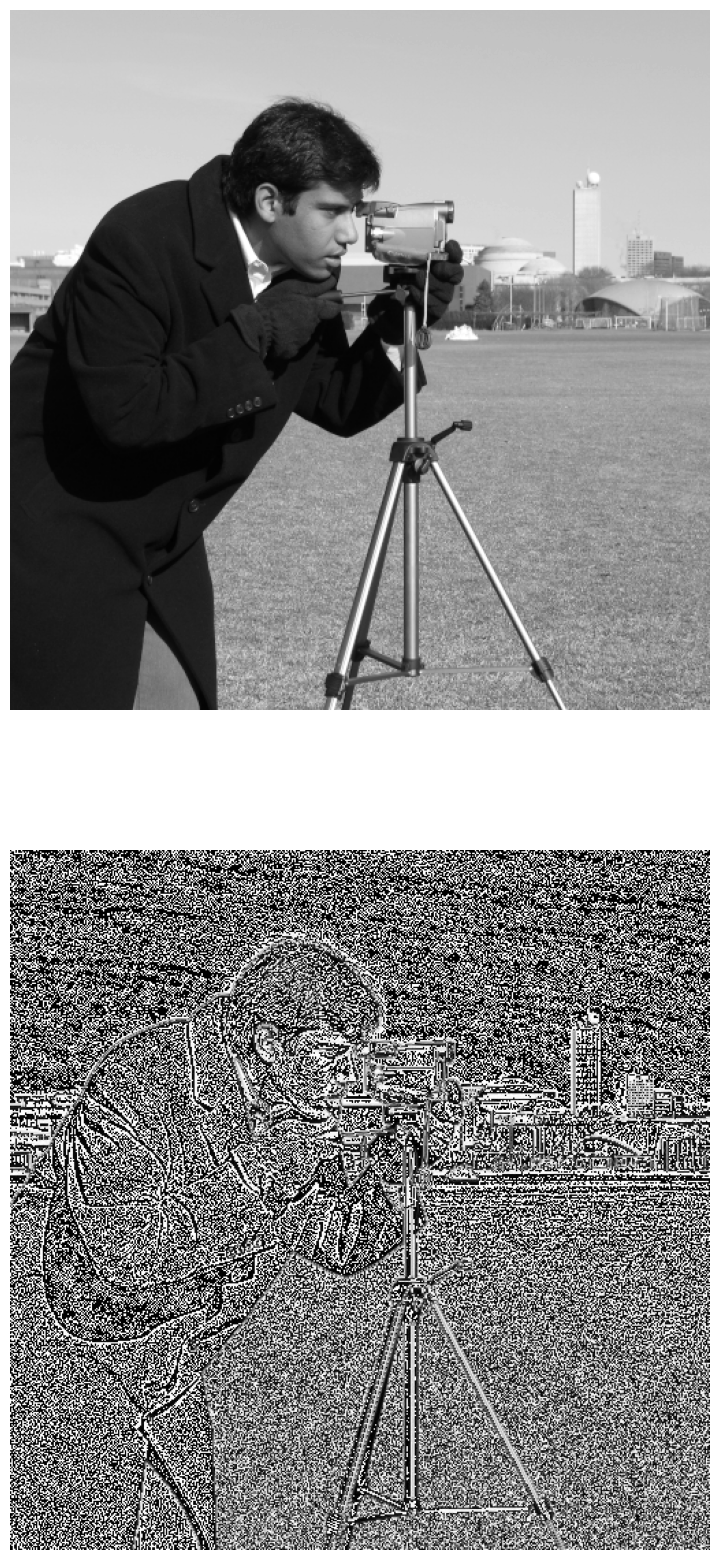

In [63]:
filteredim = ndimage.laplace(im)
imshow2(im, filteredim)

## Median

In [64]:
im = ski.io.imread('s&p.jpg')
im = np.average(im, weights=[0.2125, 0.7154, 0.0721], axis=-1)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


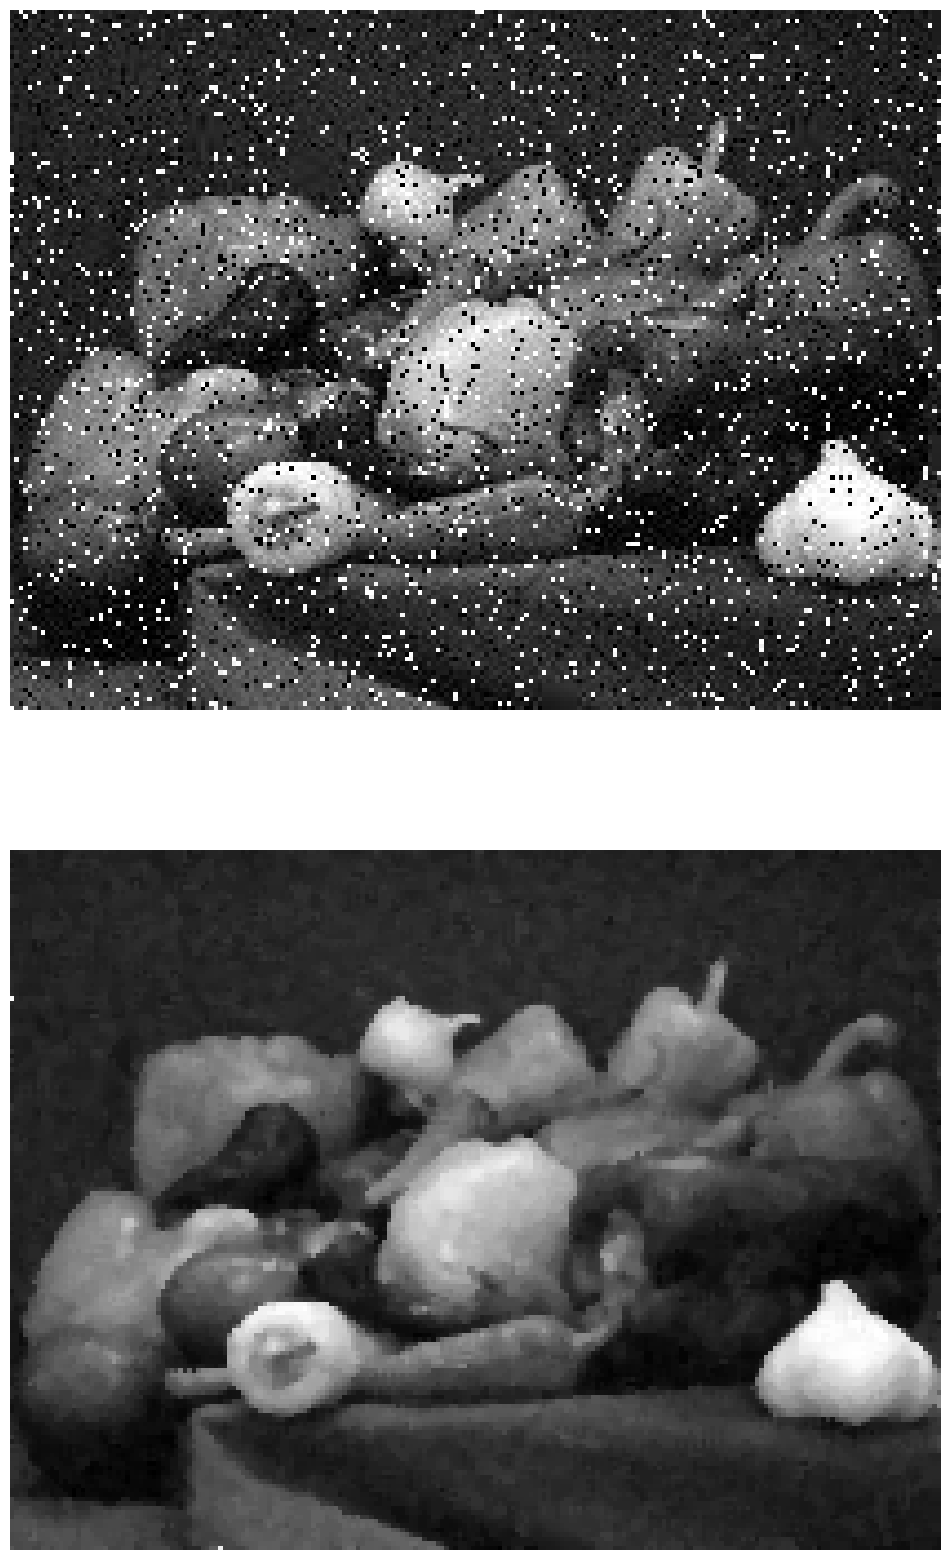

In [65]:
filteredim = ndimage.median_filter(im, size=3)
imshow2(im, filteredim)

In [35]:
def statorder(mat, n=3, op=np.median):
    r, c = mat.shape
    rows, cols = r-(n-1), c-(n-1)
    out = np.zeros((rows, cols), dtype=np.float64)
    for i in range(rows):
        for j in range(cols):
            out[i, j] = op(mat[i:i+n,j:j+n])
    return out

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


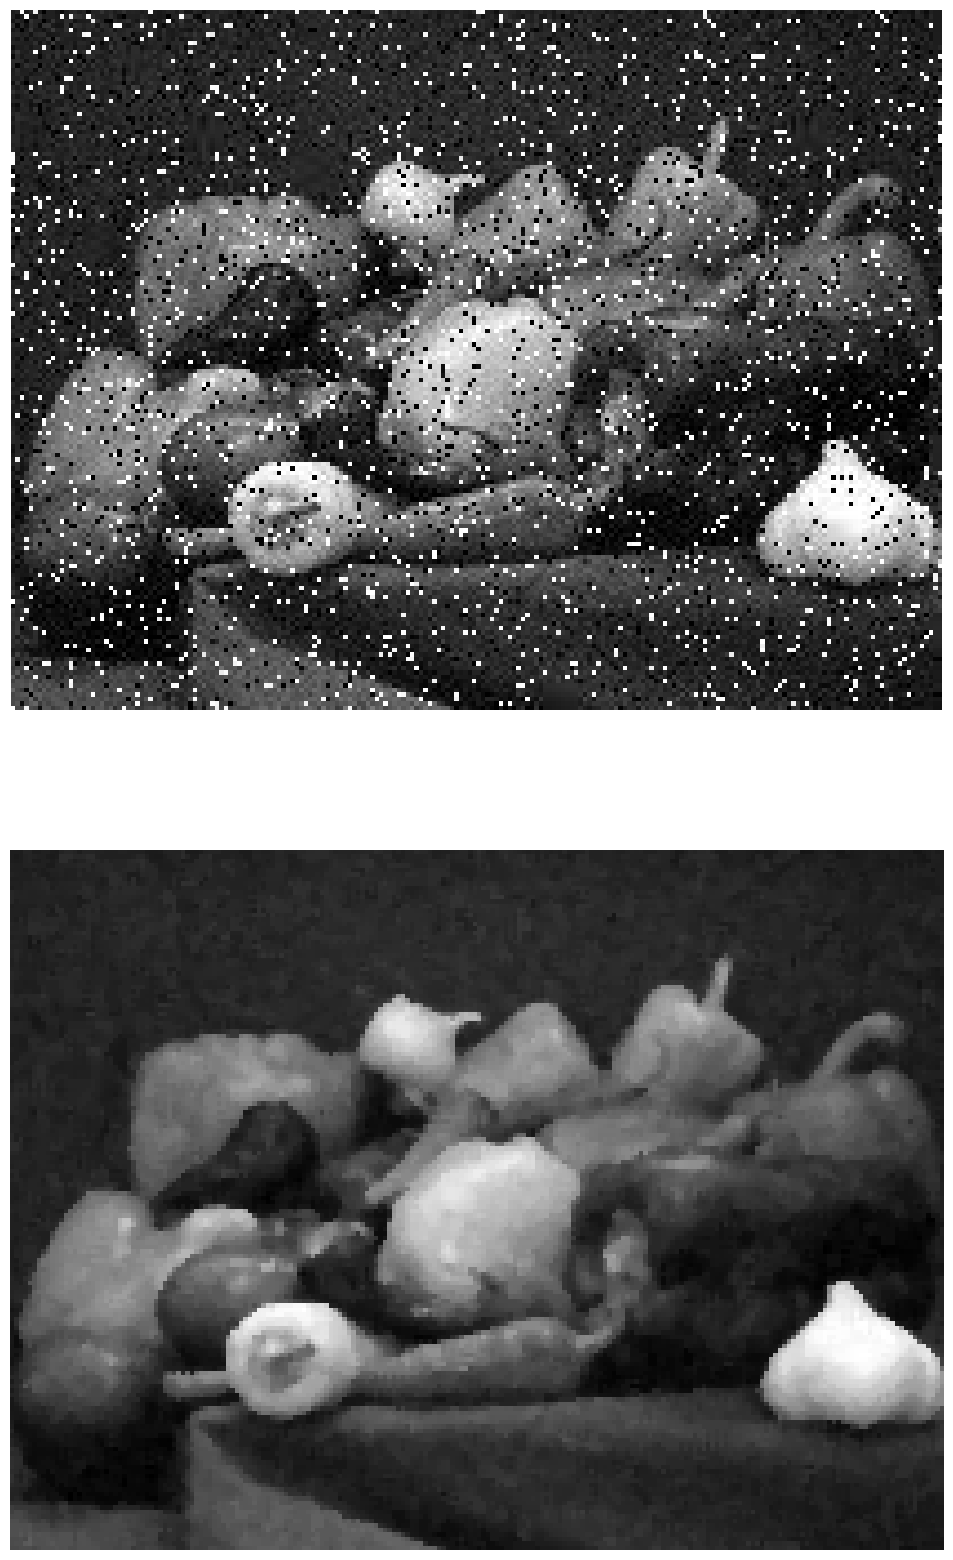

In [66]:
filteredim = statorder(im)
imshow2(im, filteredim)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


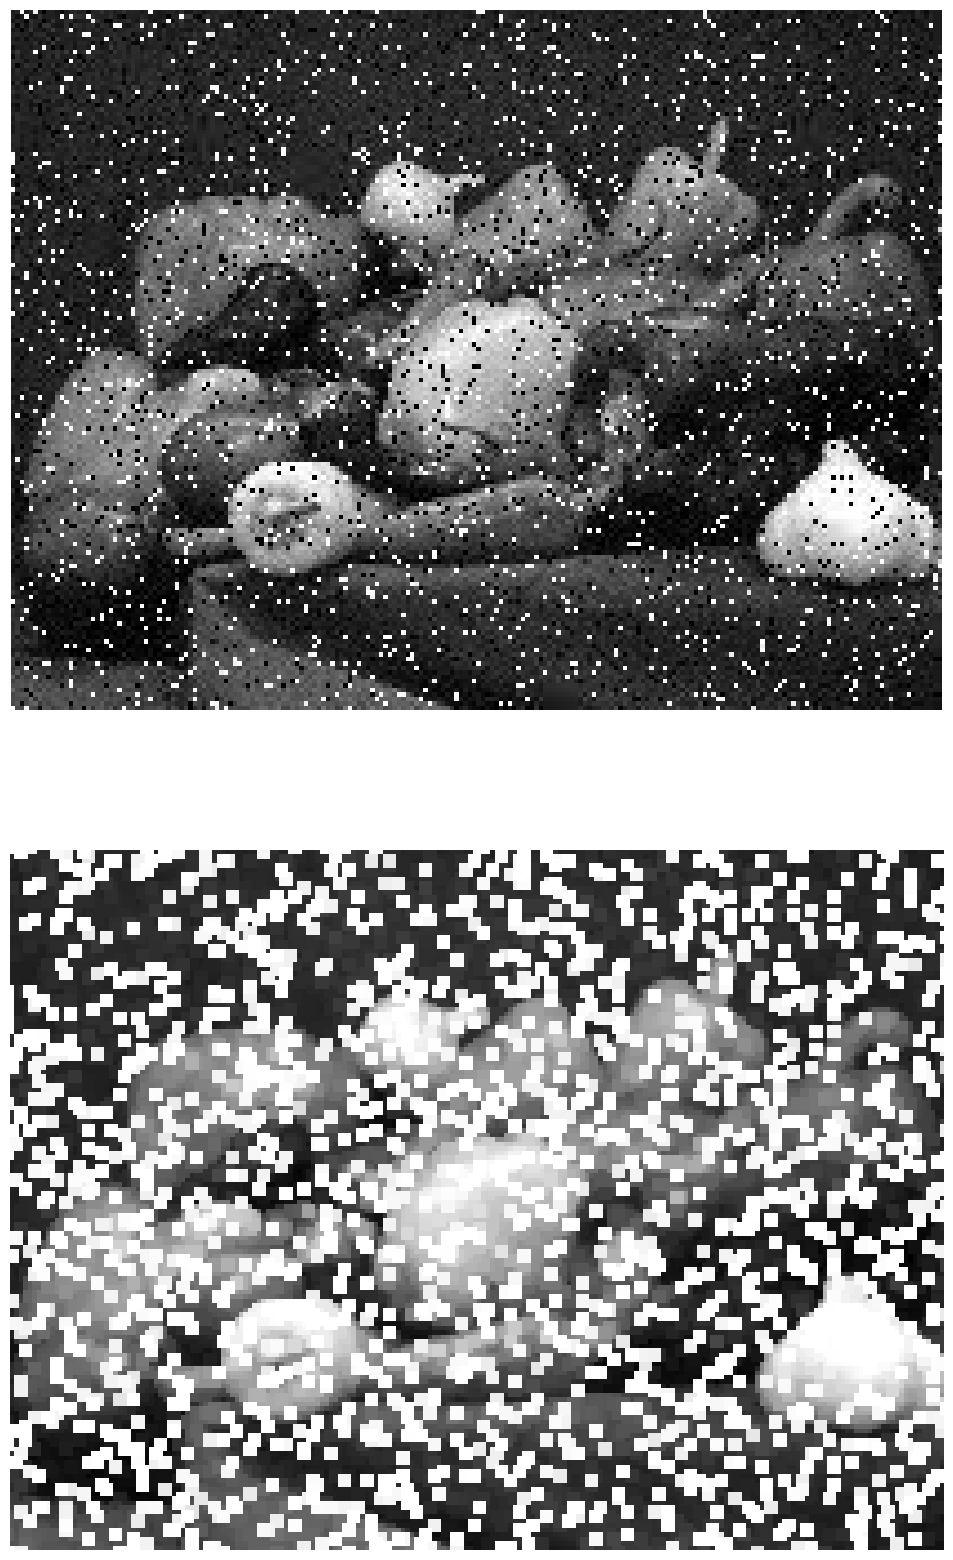

In [68]:
filteredim = statorder(im, op=np.max)
imshow2(im, filteredim)

C:\Users\Proyecto\AppData\Local\Temp\ipykernel_12704\4101845437.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


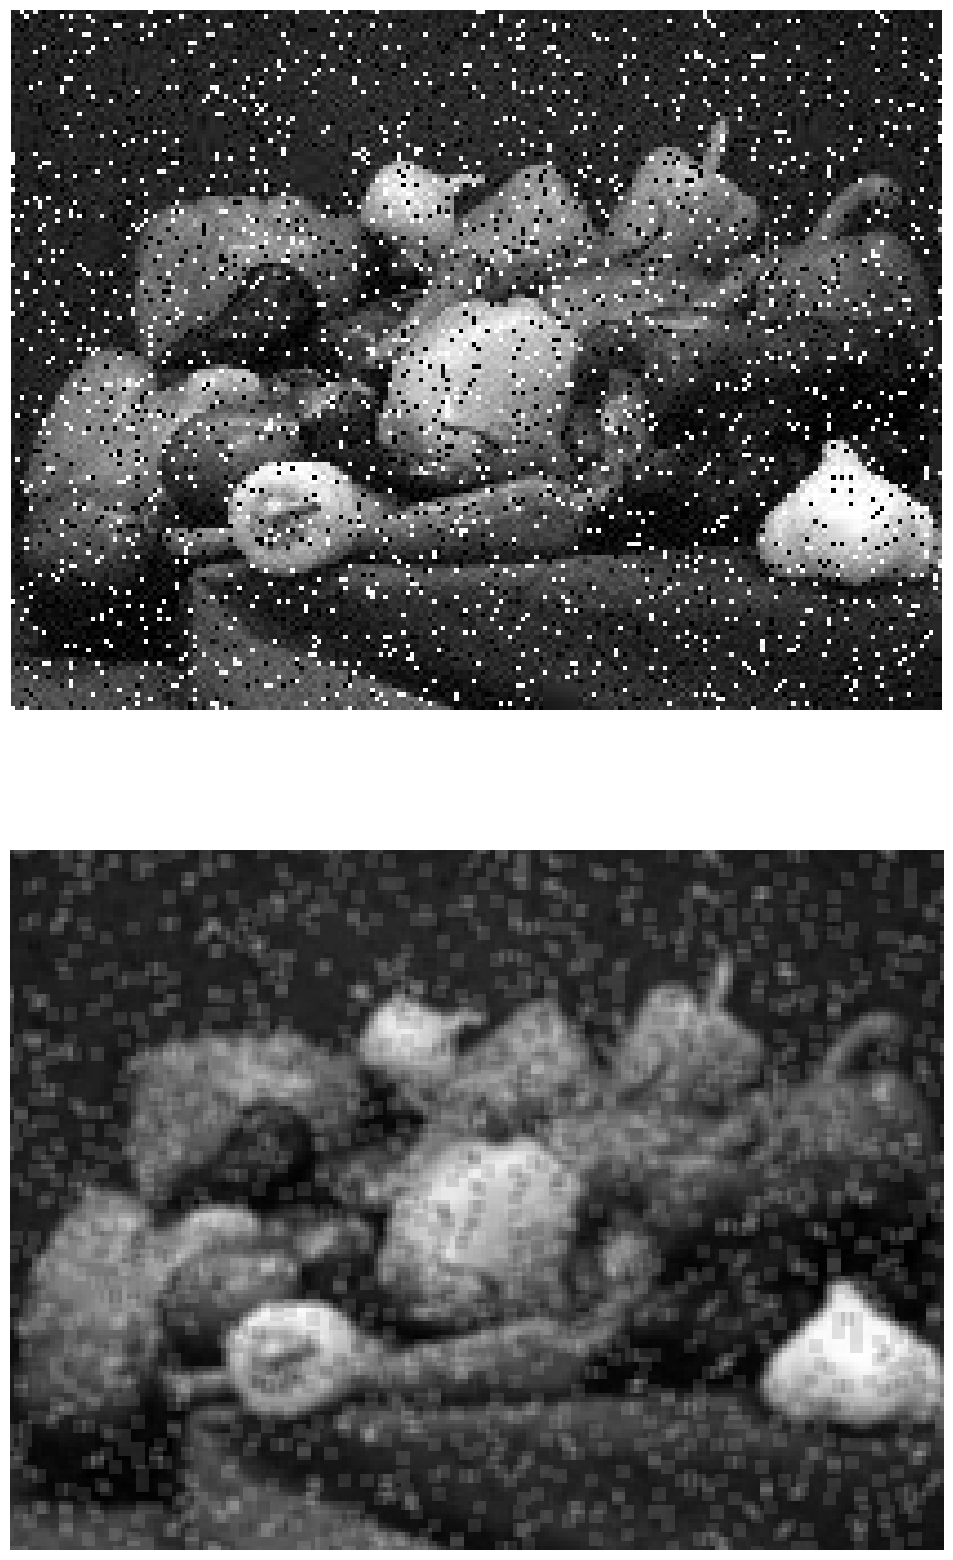

In [74]:
filteredim = statorder(im, op=np.mean)
imshow2(im, filteredim)